In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import data
df = data.DataReader(['PLANB.BK', 'KKP.BK', 'TU.BK', 'BDMS.BK'], 'yahoo', start='2022/01/01', end='2022/12/22')
df.head()

Attributes Adj Close                                     Close         \
Symbols     PLANB.BK     KKP.BK      TU.BK    BDMS.BK PLANB.BK KKP.BK   
Date                                                                    
2022-01-04      8.05  59.683891  19.278946  22.217142     8.05  61.50   
2022-01-05      7.90  59.683891  19.571053  22.514694     7.90  61.50   
2022-01-06      7.60  60.654362  19.960526  22.217142     7.60  62.50   
2022-01-07      7.60  61.139595  19.960526  22.415510     7.60  63.00   
2022-01-10      7.55  63.323154  20.155264  22.514694     7.55  65.25   

Attributes                           High         ...        Low             \
Symbols         TU.BK    BDMS.BK PLANB.BK KKP.BK  ...      TU.BK    BDMS.BK   
Date                                              ...                         
2022-01-04  19.799999  22.400000     8.30  61.75  ...  19.600000  22.299999   
2022-01-05  20.100000  22.700001     8.25  61.75  ...  19.700001  22.299999   
2022-01-06  20.500000  22.400000     7.90  63.00  ...  20.100000  22.299999   
2022-01-07  20.500000  22.600000     7.65  63.50  ...  20.400000  22.500000   
2022-01-10  20.700001  22.700001     7.70  65.75  ...  20.500000  22.500000   

Attributes     Open                                   Volume              \
Symbols    PLANB.BK KKP.BK      TU.BK    BDMS.BK    PLANB.BK      KKP.BK   
Date                                                                       
2022-01-04     7.70  60.25  19.700001  23.000000  38313500.0   4439200.0   
2022-01-05     7.80  61.50  19.700001  22.400000  38429300.0   2908800.0   
2022-01-06     7.90  61.50  20.200001  22.700001  32351600.0   8000300.0   
2022-01-07     7.65  62.50  20.600000  22.600000  10071300.0   5542400.0   
2022-01-10     7.60  63.25  20.700001  22.600000  12728900.0  12652600.0   

Attributes                          
Symbols          TU.BK     BDMS.BK  
Date                                
2022-01-04  21274500.0  72220800.0  
2022-01-05  43145500.0  27046600.0  
2022-01-06  52872100.0  38953600.0  
2022-01-07  21091100.0  25742700.0  
2022-01-10  32082300.0   9308500.0  

[5 rows x 24 columns]

In [4]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,PLANB.BK,KKP.BK,TU.BK,BDMS.BK
Date,,,,
2022-01-04,8.05,59.683891,19.278946,22.217142
2022-01-05,7.90,59.683891,19.571053,22.514694
2022-01-06,7.60,60.654362,19.960526,22.217142
2022-01-07,7.60,61.139595,19.960526,22.415510
2022-01-10,7.55,63.323154,20.155264,22.514694


In [5]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,PLANB.BK,KKP.BK,TU.BK,BDMS.BK
Symbols,,,,
PLANB.BK,0.000413,0.000043,2.488862e-05,1.161120e-05
KKP.BK,0.000043,0.000202,5.189275e-05,3.901642e-05
TU.BK,0.000025,0.000052,2.126093e-04,9.540116e-07
BDMS.BK,0.000012,0.000039,9.540116e-07,1.964579e-04


In [6]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,PLANB.BK,KKP.BK,TU.BK,BDMS.BK
Symbols,,,,
PLANB.BK,1.000000,0.147557,0.084020,0.040777
KKP.BK,0.147557,1.000000,0.250600,0.196010
TU.BK,0.084020,0.250600,1.000000,0.004668
BDMS.BK,0.040777,0.196010,0.004668,1.000000


In [8]:
# Randomly weighted portfolio's variance
w = {'PLANB.BK': 0.25, 'KKP.BK': 0.25, 'TU.BK': 0.25, 'BDMS.BK': 0.25}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var.round(4)

0.0001

In [11]:
# Monthly returns for individual companies
ind_er = df.resample('M').last().pct_change().mean()
ind_er

Symbols
PLANB.BK   -0.028157
KKP.BK     -0.012688
TU.BK      -0.028608
BDMS.BK     0.022159
dtype: float64

In [13]:
# Portfolio returns
w = [0.25, 0.25, 0.25, 0.25]
port_er = (w*ind_er).sum()
port_er.round(4)

-0.0118

In [14]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
PLANB.BK    0.321215
KKP.BK      0.224546
TU.BK       0.230548
BDMS.BK     0.221618
dtype: float64

In [16]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
PLANB.BK,-0.028157,0.321215
KKP.BK,-0.012688,0.224546
TU.BK,-0.028608,0.230548
BDMS.BK,0.022159,0.221618


In [17]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [18]:
num_assets = len(df.columns)
num_portfolios = 10000

In [19]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [20]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [21]:
for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [22]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,PLANB.BK weight,KKP.BK weight,TU.BK weight,BDMS.BK weight
0,-0.007256,0.179287,0.450513,0.084262,0.075073,0.390152
1,0.000602,0.153789,0.033359,0.057418,0.352149,0.557074
2,-0.006128,0.146287,0.243985,0.199036,0.178763,0.378216
3,-0.013468,0.147228,0.245493,0.272607,0.271345,0.210555
4,-0.005133,0.146461,0.228974,0.227068,0.154799,0.389159


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

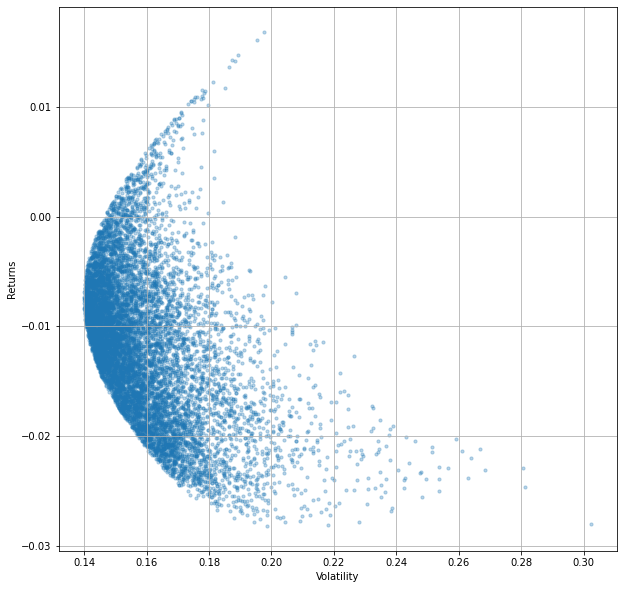

In [23]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [24]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns           -0.007334
Volatility         0.140008
PLANB.BK weight    0.138837
KKP.BK weight      0.224108
TU.BK weight       0.289512
BDMS.BK weight     0.347543
Name: 1678, dtype: float64

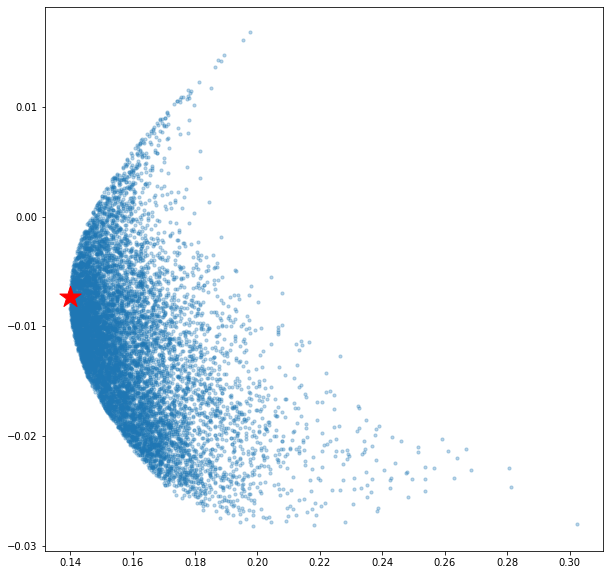

In [25]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


In [26]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns            0.016859
Volatility         0.197549
PLANB.BK weight    0.012514
KKP.BK weight      0.130324
TU.BK weight       0.002527
BDMS.BK weight     0.854635
Name: 7447, dtype: float64

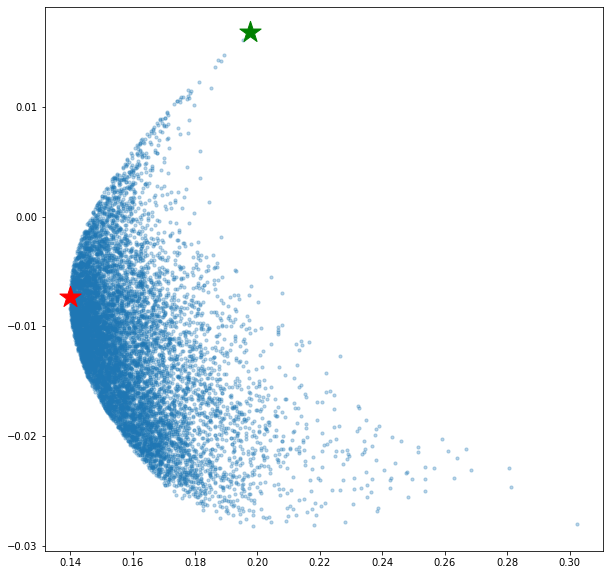

In [27]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)